# Plateforme Agnostique de Traitement et d'Analyse des Textes
### Carnet d'expérimentation
---

## Sujet : PyTorch Regression Logistique


---

# Initialisations
---

In [1]:
_rs = 42

In [2]:
cd ../..

/Volumes/Geek/Work/Patat


In [3]:
import ast
import importlib
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
tqdm.pandas()

# Préparation Données

---

## Chargement

In [4]:
import patat.util.file

filename = 'data/prod/230517-OIDS-Label.pickle'

df_label = patat.util.file.pickle_load(filename)

## Labels ou textes Nuls

In [5]:
df_label['text'].isna().sum()

0

In [6]:
df_label['infox'].isna().sum()

4

In [7]:
df_label = df_label[df_label['infox'].notna()]

In [8]:
df_label.reset_index(inplace=True)

## Données dupliquées

In [9]:
df_label.duplicated(subset='text').sum()

0

In [10]:
df_label.duplicated(subset='url').sum()

0

# Experience
---

## Normalisation et Lemmisation des paragraphes

In [11]:
import patat.ml.lex_analyser
lex = patat.ml.lex_analyser.LexAnalyser()

In [12]:
import patat.util.text

def normalize_paragraphs(parags):
    results = []
    for p in parags:
        p_result =  patat.util.text.preprocess(p)
        p_result = ' '.join(lex.get_lemmas_from_text(p_result))
        results.append(p_result)
    return results

In [13]:
df_label['l_paragraphs']=df_label['paragraphs'].progress_apply(normalize_paragraphs)

  0%|          | 0/900 [00:00<?, ?it/s]

## Normalisation et Lemmisation des textes

In [14]:
def join_l_parags(l_parags):
    return '\n'.join(l_parags)

In [15]:
df_label['l_text']=df_label['l_paragraphs'].progress_apply(join_l_parags)

  0%|          | 0/900 [00:00<?, ?it/s]

## Equilibrage Dataset

<Axes: xlabel='infox', ylabel='count'>

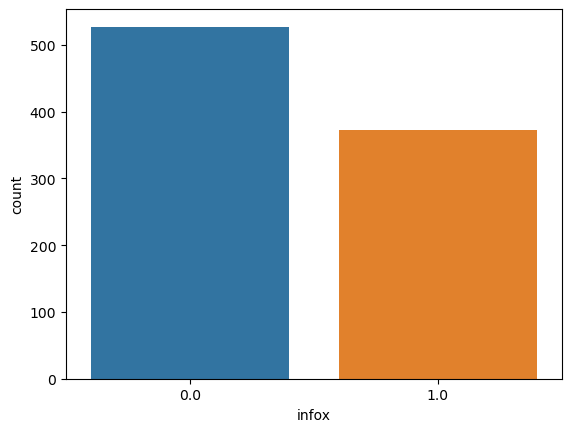

In [16]:
label_count = df_label['infox'].value_counts()
sns.barplot(x=label_count.index, y=label_count)

In [17]:
df_0 = df_label[df_label['infox'] == 0]
df_1 = df_label[df_label['infox'] == 1]

min_sample = min(len(df_0),len(df_1))


df_0=df_0.sample(min_sample,random_state=_rs)
df_1=df_1.sample(min_sample,random_state=_rs)
df_ml = pd.concat([df_0,df_1])

df_ml

,index,url,site,title,article,tags,paragraphs,date_iso,abstract,Auteur,...,degre_infox,observateur,source,p_count,text,c_count,p_size,url_h,l_paragraphs,l_text
609,610,https://www.francesoir.fr/politique-france/gue...,www.francesoir.fr,Guerre en Ukraine: Emmanuel Macron prévient le...,À l’occasion de la cérémonie pour le 78e anniv...,"[Accueil, Politique]",[À l’occasion de la cérémonie pour le 78e anni...,2022-08-20T00:00:00,,,...,,CN,Recueil,11,Guerre en Ukraine: Emmanuel Macron prévient le...,2629,239.000000,857bfacdd98e36dda26f1f92cf40c992904d6386,[occasion de la cérémonie pour le anniversaire...,occasion de la cérémonie pour le anniversaire ...
705,708,https://www.profession-gendarme.com/la-vaccina...,www.profession-gendarme.com,La vaccination Covid : un marquage de « type b...,De: Dr R Date: 16 avril 2022 à 08:17:22 ﻿bonjo...,"[Actualités, Tribune]",[De: Dr R Date: 16 avril 2022 à 08:17:22 ﻿bonj...,,,NaN,...,NaN,NaN,Test1,17,La vaccination Covid : un marquage de « type b...,6252,367.764706,166d32300f4d7766a82fe39a1185f35bc347c05f,[de dr date avril bonjour touspour les non méd...,de dr date avril bonjour touspour les non méde...
26,26,https://www.mondialisation.ca/colonialisme-ene...,www.mondialisation.ca,Colonialisme énergétique,Visite d’État du président de la République it...,"[Moyen-Orient et Afrique du Nord, Guerre USA O...",[Visite d’État du président de la République i...,2022-07-09T00:00:00,,Pangea Grandangolo,...,,GP,Recueil,8,Colonialisme énergétique\nVisite d’État du pré...,2794,349.250000,2a39a60fd5e2c6df0f6ec8ce9fedc2ee2eb4ab4d,[visite état du présider de la république ital...,visite état du présider de la république itali...
565,566,https://www.francesoir.fr/opinions-editos/de-l...,www.francesoir.fr,De l’importance d’une Assemblée vraiment natio...,"Depuis hier soir, ne serions-nous pas en train...","[Accueil, Opinions]","[Depuis hier soir, ne serions-nous pas en trai...",2022-06-20T19:46:00,,Xavier Azalbert,...,,GP,Recueil,16,De l’importance d’une Assemblée vraiment natio...,4582,286.375000,93b25370fea82c7039f7e2b00c0bd73151101af3,[depuis hier soir ne être nous pas en train as...,depuis hier soir ne être nous pas en train ass...
231,232,https://www.polemia.com/quelle-politique-migra...,www.polemia.com,Quelle politique migratoire pour la France ? –...,"Par André-Victor Robert, haut fonctionnaire ♦ ...","[Accueil, Géopolitique, Afrique, analyse, Andr...","[Facebook, Twitter, LinkedIn, Print Friendly, ...",,"Par André-Victor Robert, haut fonctionnaire ♦ ...",André Victor Robert,...,,FB,Recueil,31,Quelle politique migratoire pour la France ? –...,9123,294.290323,c12a81bb99810b5c13fba93abc5f9cea077a873d,"[facebook, twitter, linkedin, print friendly, ...",facebook\ntwitter\nlinkedin\nprint friendly\nl...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,112,https://lesdeqodeurs.fr/des-scientifiques-de-h...,lesdeqodeurs.fr,Des scientifiques de Harvard et de Johns Hopki...,Article original datant du 31/08/22 par SSRNCO...,"[ARNm, COVID, effets secondaires, étude, Harva...",[Les étudiants des universités nord-américaine...,2022-09-23T00:00:00,,,...,1,FB,Recueil,5,Des scientifiques de Harvard et de Johns Hopki...,1803,360.600000,1f56ed5fa54de7c492154ac8ee0d8d10724f1aa4,[les étudiant des université nord américain ri...,les étudiant des université nord américain ris...
157,158,https://www.voltairenet.org/article217546.html,www.voltairenet.org,L’armée russe achète des exemplaires d’armemen...,L’achat de deux canons automoteurs CAESAR fran...,[],[L’achat de deux canons automoteurs CAESAR fra...,1900-01-01T00:00:00,,,...,1,FB,Recueil,3,L’armée russe achète des exemplaires d’armemen...,718,239.333333,b3153ba0ad9e32c02a8d49c99a6748e0764b20b5,[achat de deux caner automoteur caesar françai...,achat de deux caner automoteur caesar français...
522,523,https://lemediaen442.fr/onu-le-premier-ministr...,lemediaen442.fr,ONU – Le Premier ministre de Nouvelle-Zélande ...,L’argument principal d

## Textes partiels

In [18]:
def partial_texts(text,p_count):
    parags = text.split('\n')
    result='\n'.join(parags[:p_count])
    return result

In [19]:
text = df_ml.sample(frac=1).iloc[0]['l_text']

In [20]:
text

'chronique la nouveau de la chute de lougansk dimanche dernier inscrire dans ce qui apparait comme inexorable annexion de est de ukraine par la russie aucune action militaire ukrainien ce jour contrecarrer action des troupe russe malgré énormité de arsenal transférer ce pays depuis et singulièrement depuis février la vétusté de équipement et le manque de professionnalisme des combattant ukrainien est en jeu alors que volodymyr zelensky continue de réclamer des arme notamment que lui soit allouer de arsenal de otan se pose la question de savoir ce qui été faire de ce qui déjà été obtenir dans quelles main se trouver ces stock ainsi que les don milliardaire concéder aux fin équipement militaire\nlugano une conférence sur la reconstruction de ukraine lieu ces et juillet en présence ursula von der leyen le premier ministre ukrainien denys schmigal le présider de la rader parlement ukrainien rouslan stefantchouk il agir de débloquer des fondre nouveau il est fort peu probable que la questio

In [21]:
pt = partial_texts(text,2)
print(pt)

chronique la nouveau de la chute de lougansk dimanche dernier inscrire dans ce qui apparait comme inexorable annexion de est de ukraine par la russie aucune action militaire ukrainien ce jour contrecarrer action des troupe russe malgré énormité de arsenal transférer ce pays depuis et singulièrement depuis février la vétusté de équipement et le manque de professionnalisme des combattant ukrainien est en jeu alors que volodymyr zelensky continue de réclamer des arme notamment que lui soit allouer de arsenal de otan se pose la question de savoir ce qui été faire de ce qui déjà été obtenir dans quelles main se trouver ces stock ainsi que les don milliardaire concéder aux fin équipement militaire
lugano une conférence sur la reconstruction de ukraine lieu ces et juillet en présence ursula von der leyen le premier ministre ukrainien denys schmigal le présider de la rader parlement ukrainien rouslan stefantchouk il agir de débloquer des fondre nouveau il est fort peu probable que la question 

## Tests Entrainement

In [22]:
df_ml=df_ml.sample(frac=1,random_state=_rs)

In [23]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [24]:
logreg = LogisticRegression(C=200, random_state=_rs, solver='lbfgs', multi_class='ovr', max_iter=1000)

In [25]:
#iw = get_common_words(20)
#iw = get_rare_words(1)
iw=None
pipelineLR = Pipeline(steps = [
    ('vectorizer',TfidfVectorizer(preprocessor=None, tokenizer=None, stop_words=iw)), 
    ('classifier',logreg)
                  ])

In [26]:
def cut_text(text):
    return partial_texts(text,nb_parags)

In [27]:
df_means = {}
for nb_parags in [1,2,3,5,8,13,21,34]:
    
    print(f'Crossvalidating nb_parags={nb_parags}')

    X = df_ml['text'].apply(cut_text)
    y = df_ml['infox']

    #classifier = pipelineMLPC
    classifier = pipelineLR
    scores = cross_validate(classifier, X, y, cv=4,
                            scoring=('roc_auc','f1','accuracy','precision','recall'))
    df_scores=pd.DataFrame(scores)
    df_means[nb_parags] = df_scores.describe().loc['mean']


Crossvalidating nb_parags=1
Crossvalidating nb_parags=2
Crossvalidating nb_parags=3
Crossvalidating nb_parags=5
Crossvalidating nb_parags=8
Crossvalidating nb_parags=13
Crossvalidating nb_parags=21
Crossvalidating nb_parags=34


In [28]:
pd.set_option('display.precision',3)
bench = pd.DataFrame(df_means)
bench

,1,2,3,5,8,13,21,34
fit_time,0.024,0.048,0.087,0.125,0.198,0.252,0.332,0.375
score_time,0.005,0.011,0.018,0.030,0.045,0.063,0.082,0.097
test_roc_auc,0.662,0.783,0.774,0.812,0.821,0.838,0.844,0.849
test_f1,0.631,0.720,0.702,0.744,0.743,0.770,0.772,0.781
test_accuracy,0.615,0.714,0.696,0.740,0.735,0.765,0.764,0.775
test_precision,0.607,0.708,0.689,0.733,0.722,0.756,0.747,0.761
test_recall,0.657,0.732,0.716,0.756,0.767,0.785,0.799,0.802


In [29]:
bench.loc[['test_accuracy','test_f1'],[5,8,13]]

,5,8,13
test_accuracy,0.740,0.735,0.765
test_f1,0.744,0.743,0.770


In [30]:
bench.loc[['test_accuracy','test_f1'],[5,8,13]]

,5,8,13
test_accuracy,0.740,0.735,0.765
test_f1,0.744,0.743,0.770


<Axes: >

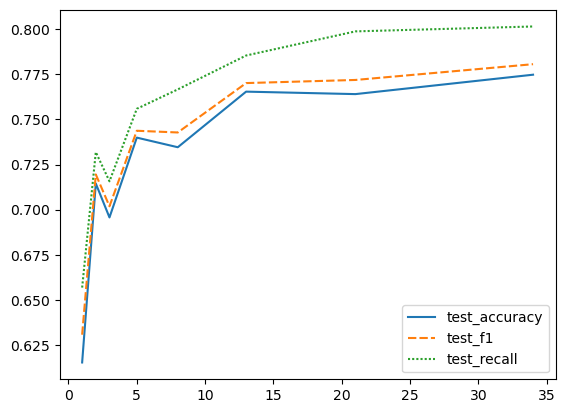

In [31]:
sns.lineplot(data=bench.T[['test_accuracy','test_f1','test_recall']])

<Axes: xlabel='test_accuracy', ylabel='test_recall'>

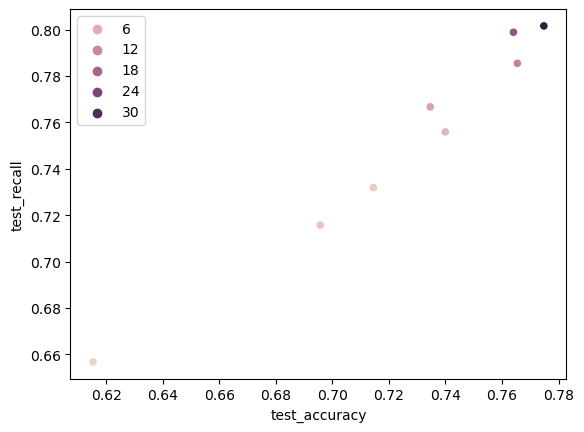

In [32]:
sns.scatterplot(data=bench.T,x='test_accuracy',y='test_recall',hue=bench.T.index)

# PyTorch Logistic Regression

In [33]:
import numpy as np
import torch
import torch.nn as nn

### 0. Prepare data

In [34]:
device = 'mps' if torch.backends.mps.is_available else 'cpu'
device

'mps'

In [35]:
nb_parags = 10
vectorizer=TfidfVectorizer()
#X = vectorizer.fit_transform(df_ml['l_text'].progress_apply(cut_text))
X = vectorizer.fit_transform(df_ml['text'])
y = df_ml['infox']

In [36]:
n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=_rs)

In [37]:
# scale
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [38]:
X_train = torch.from_numpy(X_train.toarray().astype(np.float32))
X_test = torch.from_numpy(X_test.toarray().astype(np.float32))
y_train = torch.from_numpy(y_train.values.astype(np.float32))
y_test = torch.from_numpy(y_test.values.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

### 1. Model

In [39]:
# Linear model f = wx + b , sigmoid at the end
class LRModel(nn.Module):
    
    _nb_hidden = 8
    
    def __init__(self, n_input_features):
        super(LRModel, self).__init__()
#        self.linear = nn.Linear(n_input_features, 1)
        self.linear = nn.Linear(n_input_features, self._nb_hidden)
        self.relu = nn.ReLU(self._nb_hidden)
        self.hidden = nn.Linear(self._nb_hidden, 1)

    def forward(self, x):
        y_pred = self.linear(x)
        y_pred = self.relu(y_pred)
        y_pred = self.hidden(y_pred)
        y_pred = torch.sigmoid(y_pred)
        return y_pred

model = LRModel(n_features)
model.to(device)

LRModel(
  (linear): Linear(in_features=45807, out_features=8, bias=True)
  (relu): ReLU(inplace=True)
  (hidden): Linear(in_features=8, out_features=1, bias=True)
)

### 2. Loss and optimizer

In [40]:
num_epochs = 1000
learning_rate = 0.1
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### 3. Training loop - MPS

In [41]:
X_train=X_train.to(device)
X_test=X_test.to(device)
y_train=y_train.to(device)
y_test=y_test.to(device)

In [42]:
%%time
scores=[]
for epoch in tqdm(range(num_epochs)):
    # Forward pass and loss
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 100 == 0:
        with torch.no_grad():
            y_predicted = model(X_test)
            y_predicted_cls = y_predicted.round()
            pred = y_predicted.to('cpu').T.numpy().round()[0]
            proba = y_predicted.to('cpu').T.numpy()[0]
            true = y_test.to('cpu').T.numpy()[0]

            accuracy = metrics.accuracy_score(true,pred)
            f1 = metrics.f1_score(true,pred)
            recall = metrics.recall_score(true,pred)
            roc_auc = metrics.roc_auc_score(true,proba)
            scores.append({
                'epoch': epoch+1,
                'loss': float(loss),
                'accuracy': accuracy,
                'f1': f1,
                'recall': recall,
                'roc_auc': roc_auc,
            })

  0%|          | 0/1000 [00:00<?, ?it/s]

CPU times: user 1.04 s, sys: 170 ms, total: 1.21 s
Wall time: 1.84 s


### Metriques

<Axes: xlabel='epoch'>

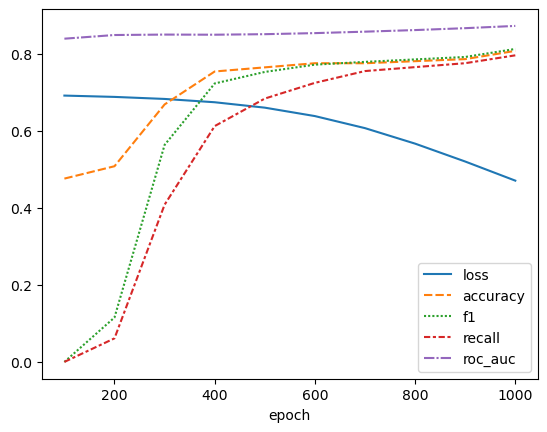

In [43]:
df_scores = pd.DataFrame(scores).set_index('epoch')
sns.lineplot(df_scores)

In [44]:
df_scores

,loss,accuracy,f1,recall,roc_auc
epoch,,,,,
100,0.691,0.476,0.000,0.000,0.839
200,0.688,0.508,0.115,0.061,0.849
300,0.683,0.668,0.563,0.408,0.850
400,0.674,0.754,0.723,0.612,0.849
500,0.660,0.765,0.753,0.684,0.851
600,0.638,0.775,0.772,0.724,0.854
700,0.607,0.775,0.779,0.755,0.857
800,0.567,0.781,0.785,0.765,0.861
900,0.520,0.786,0.792,0.776,0.866


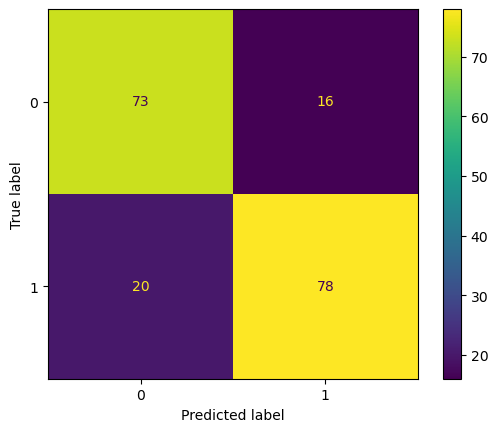

In [45]:
cm = metrics.confusion_matrix(true, pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Sauvegarde des résultats
---

# Conclusions
---

# Perfs CPU
---

### 3. Training loop - CPU

In [ ]:
device = torch.device('cpu')
model = LRModel(n_features)
model.to(device)

X_train=X_train.to(device)
X_test=X_test.to(device)
y_train=y_train.to(device)
y_test=y_test.to(device)

In [ ]:
%%time
scores=[]
for epoch in tqdm(range(num_epochs)):
    # Forward pass and loss
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 100 == 0:
        with torch.no_grad():
            y_predicted = model(X_test)
            y_predicted_cls = y_predicted.round()
            pred = y_predicted.to('cpu').T.numpy().round()[0]
            proba = y_predicted.to('cpu').T.numpy()[0]
            true = y_test.to('cpu').T.numpy()[0]

            accuracy = metrics.accuracy_score(true,pred)
            f1 = metrics.f1_score(true,pred)
            recall = metrics.recall_score(true,pred)
            roc_auc = metrics.roc_auc_score(true,proba)
            scores.append({
                'epoch': epoch+1,
                'loss': float(loss),
                'accuracy': accuracy,
                'f1': f1,
                'recall': recall,
                'roc_auc': roc_auc,
            })